# Gradient Descent Optimization Algorithm

## <font color='red'>Table of contents:</font>

- <font color='green'>Gradient descent variants</font>
    - <font color='blue'>Batch gradient descent</font>
    - <font color='blue'>Stochastic gradient descent</font>
        - <font color='orange'>Batch gradient descent versus Stochastic gradient descent</font>

- <font color='green'>Gradient descent algorithms</font>
    - <font color='blue'>Momentum</font>
    - <font color='blue'>Adam</font>
        - <font color='orange'>Momentum versus Adam</font>

In [1]:
import ipywidgets as widgets
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size": 16})
import pandas as pd
from scipy.optimize import minimize

**Gradient Descent:** is a common optimization algorithm used to train machine learning models in neural networks by traning on data that these models can learn over time, and because they are learning over time, they can improve their accuracy. It is used find to the minimum of something called a cost function.

**Cost function:** tells us how far off predictions are from the actual values.

<img src=https://miro.medium.com/max/828/1*_6TVU8yGpXNYDkkpOfnJ6Q.webp width="500">

## 1D Optimization without Data

In [2]:
def f(x, m = 0):
    d = x - m
    return d * d
def g(x, m = 0):
    return x - m

In [3]:
def gradient_descent_without_data(grad, init, stepsize):
    return init - stepsize * grad(init)

In [4]:
@interact(
    S = widgets.IntSlider(value=0, min=0, max=75, step=1, description = "steps")
)
def plot_gradient_descent(S):
    m = 0
    stepsize = 0.1 # range from 0 to 2

    x = np.linspace(m - 10, m + 10, 301)
    fx = f(x, m = m)
    plt.plot(x, fx);
    xmin = m + 8
    xmins = np.zeros(S + 1)
    xmins[0] = xmin
    for s in range(S):
        xmin = gradient_descent_without_data(g, xmin, stepsize)
        xmins[s + 1] = xmin
    plt.plot(xmins, f(xmins, m = m), marker = "o", linestyle = "-", c = "orange", markersize = 10)
    plt.title(f"After {S} steps, x_min = {xmin:.2f}")

interactive(children=(IntSlider(value=0, description='steps', max=75), Output()), _dom_classes=('widget-intera…

## <font color='green'>Gradient descent variants</font>

There are diffent type variants of gradient descent, which differ in how much data we use to compute the gradient of the objective function. Depending on the amount of data, we make a trade-off between the accuracy of the parameter update and the time it takes to perform an update.

In [5]:
# Generate data
true_slope = 10.889
true_intercept = 3.456
input_var = np.arange(0.0,100.0)
output_var = true_slope * input_var + true_intercept + 500.0 * np.random.rand(len(input_var))

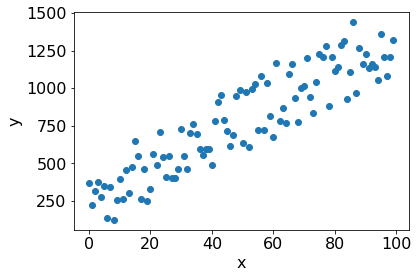

In [6]:
plt.figure()
plt.scatter(input_var, output_var)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [7]:
def compute_cost(input_var, output_var, params):
    # Compute linear regression cost"
    num_samples = len(input_var)
    cost_sum = 0.0
    for x,y in zip(input_var, output_var):
        y_hat = np.dot(params, np.array([1.0 , x]))
        cost_sum += (y_hat - y) ** 2
        
    cost = cost_sum / (num_samples * 2.0)    
    
    return cost

## <font color='blue'>Batch gradient descent</font>

**Batch Gradient Descent:** all the training data is taken into consideration to take a single step. We take the average of the gradients of all the training examples and then use that mean gradient to update our parameters.

In [8]:
def lin_reg_batch_gradient_descent(input_var, output_var, params, alpha, max_iter):
    # Compute the params for linear regression using batch gradient descent
    iteration = 0
    num_samples = len(input_var)
    cost = np.zeros(max_iter)
    params_store = np.zeros([2, max_iter])
    
    while iteration < max_iter:
        cost[iteration] = compute_cost(input_var, output_var, params)
        params_store[:, iteration] = params
        
        print("-------------------------------")
        print(f"iteration: {iteration}")
        print(f"cost: {cost[iteration]}")
        
        for x,y in zip(input_var, output_var):
            y_hat = np.dot(params, np.array([1.0 , x]))
            gradient = np.array([1.0, x]) * (y - y_hat)
            params += alpha * gradient/num_samples
            
        iteration += 1
    
    return params, cost, params_store

In [9]:
from sklearn.model_selection import train_test_split
# Train the model
x_train, x_test, y_train, y_test = train_test_split(input_var, output_var, test_size = 0.20)

params_0 = np.array([20.0, 80.0])

alpha_batch = 1e-3
max_iter = 100
params_hat_batch, cost_batch, params_store_batch = lin_reg_batch_gradient_descent(x_train, y_train, params_0, alpha_batch, max_iter)

-------------------------------
iteration: 0
cost: 7629336.121282573
-------------------------------
iteration: 1
cost: 22201.841873604793
-------------------------------
iteration: 2
cost: 16542.34896427021
-------------------------------
iteration: 3
cost: 16524.658726491645
-------------------------------
iteration: 4
cost: 16520.990904321054
-------------------------------
iteration: 5
cost: 16517.60044486441
-------------------------------
iteration: 6
cost: 16514.21875771243
-------------------------------
iteration: 7
cost: 16510.83884380292
-------------------------------
iteration: 8
cost: 16507.460518418655
-------------------------------
iteration: 9
cost: 16504.083775980384
-------------------------------
iteration: 10
cost: 16500.708615619606
-------------------------------
iteration: 11
cost: 16497.33503659207
-------------------------------
iteration: 12
cost: 16493.963038157064
-------------------------------
iteration: 13
cost: 16490.59261957437
-----------------------

## <font color='blue'>Stochastic gradient descent</font>

**Stochastic Gradient Descent:** one training data is taken into consideration at a time to take a single step.

In [10]:
def lin_reg_stoch_gradient_descent(input_var, output_var, params, alpha):
    # Compute the params for linear regression using stochastic gradient descent
    num_samples = len(input_var)
    cost = np.zeros(num_samples)
    params_store = np.zeros([2, num_samples])
    
    iteration = 0
    for x,y in zip(input_var, output_var):
        cost[iteration] = compute_cost(input_var, output_var, params)
        params_store_batch[:, iteration] = params
        
        print("-------------------------------")
        print(f"iteration: {iteration}")
        print(f"cost: {cost[iteration]}")
        
        y_hat = np.dot(params, np.array([1.0 , x]))
        gradient = np.array([1.0, x]) * (y - y_hat)
        params += alpha * gradient/num_samples
        
        iteration += 1
    
    return params, cost, params_store

In [11]:
alpha = 1e-3
params_0 = np.array([20.0, 80.0])
params_hat, cost, params_store = lin_reg_stoch_gradient_descent(x_train, y_train, params_0, alpha)

-------------------------------
iteration: 0
cost: 7629336.121282573
-------------------------------
iteration: 1
cost: 7256630.743362673
-------------------------------
iteration: 2
cost: 6296484.337286629
-------------------------------
iteration: 3
cost: 5894022.055546116
-------------------------------
iteration: 4
cost: 4706503.388540336
-------------------------------
iteration: 5
cost: 4592234.361510107
-------------------------------
iteration: 6
cost: 3584897.587255817
-------------------------------
iteration: 7
cost: 2988578.73302314
-------------------------------
iteration: 8
cost: 2989056.607444196
-------------------------------
iteration: 9
cost: 2965605.2923858473
-------------------------------
iteration: 10
cost: 2907679.13793452
-------------------------------
iteration: 11
cost: 2383798.115626017
-------------------------------
iteration: 12
cost: 2384430.26719577
-------------------------------
iteration: 13
cost: 2366590.714186327
-------------------------------


## <font color='orange'>Batch gradient descent versus Stochastic gradient descent</font>

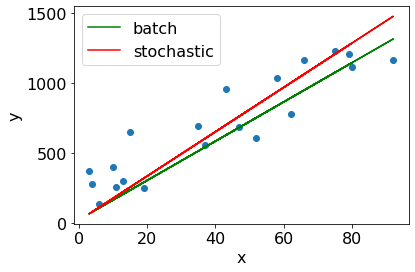

batch       T0, T1: 24.802448219388474, 14.001283199939179
stochastic  T0, T1: 19.11140230194782, 15.820073159071656
batch rms:      185.44259275619982
stochastic rms: 186.08200703387354


In [12]:
plt.figure()
plt.scatter(x_test, y_test)
plt.plot(x_test, params_hat_batch[0] + params_hat_batch[1] * x_test, "g", label = "batch")
plt.plot(x_test, params_hat[0] + params_hat[1] * x_test, "r", label = "stochastic")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()
print(f"batch       T0, T1: {params_hat_batch[0]}, {params_hat_batch[1]}")
print(f"stochastic  T0, T1: {params_hat[0]}, {params_hat[1]}")
rms_batch = np.sqrt(np.mean(np.square(params_hat_batch[0] + params_hat_batch[1] * x_test - y_test)))
rms_stochastic = np.sqrt(np.mean(np.square(params_hat[0] + params_hat[1] * x_test - y_test)))
print(f"batch rms:      {rms_batch}")
print(f"stochastic rms: {rms_stochastic}")

T0 is the intercept and T1 is the slope. rms is the estimate error, the lower the number is better.

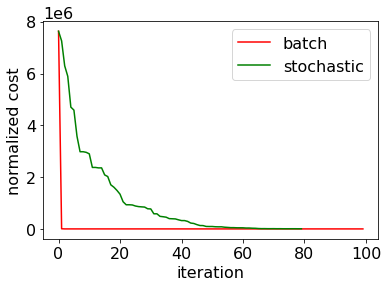

min cost with BGD: 16206.566456431106
min cost with SGD: 21981.350120270396


In [13]:
plt.figure()
plt.plot(np.arange(max_iter), cost_batch, "r", label = "batch")
plt.plot(np.arange(len(cost)), cost, "g", label = "stochastic")
plt.xlabel("iteration")
plt.ylabel("normalized cost")
plt.legend()
plt.show()
print(f"min cost with BGD: {np.min(cost_batch)}")
print(f"min cost with SGD: {np.min(cost)}")

## <font color='red'>Advantages and Disadvantages:</font>

**Advantages of Batch Gradient Descent:**
- Less oscillations and noisy steps taken towards the global minima of the loss function due to updating the parameters by computing the average of all the training samples rather than the value of a single sample.
- It can benefit from the vectorization which increases the speed of processing all training samples together.
- It produces a more stable gradient descent convergence and stable error gradient than stochastic gradient descent.
- It is computationally efficient as all computer resources are not being used to process a single sample rather are being used for all training samples.

**Disadvantages of Batch Gradient Descent:**
- Sometimes a stable error gradient can lead to a local minima and unlike stochastic gradient descent no noisy steps are there to help get out of the local minima.
- The entire training set can be too large to process in the memory due to which additional memory might be needed.
- Depending on computer resources it can take too long for processing all the training samples as a batch.

**Advantages of Stochastic Gradient Descent:**
- It is easier to fit into memory due to a single training sample being processed by the network.
- It is computationally fast as only one sample is processed at a time.
- For larger datasets it can converge faster as it causes updates to the parameters more frequently.
- Due to frequent updates the steps taken towards the minima of the loss function have oscillations which can help getting out of local minimums of the loss function (in case the computed position turns out to be the local minimum).

**Disadvantages of Stochastic Gradient Descent:**
- Due to frequent updates the steps taken towards the minima are very noisy. This can often lead the gradient descent into other directions.
- Also, due to noisy steps it may take longer to achieve convergence to the minima of the loss function.
- Frequent updates are computationally expensive due to using all resources for processing one training sample at a time.
- It loses the advantage of vectorized operations as it deals with only a single example at a time.

## <font color='green'>Gradient descent algorithms</font>

There are some algorithms that are widely used by the deep learning community.

### Gradient Descent Optimization Without Momentum

In [14]:
# gradient descent algorithm without momentum for a one-dimensional test function
from numpy.random import rand
from numpy.random import seed

# objective function
def objective(x):
    return x**2.0

# derivative of objective function
def derivative(x):
    return x * 2.0

# gradient descent algorithm without momentum
def gradient_descent(objective, derivative, bounds, n_iter, step_size):
    # generate an initial point
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # run the gradient descent
    for i in range(n_iter):
        # calculate gradient
        gradient = derivative(solution)
        # take a step
        solution = solution - step_size * gradient
        # evaluate candidate point
        solution_eval = objective(solution)
        # report progress
        print(">%d f(%s) = %.5f" % (i, solution, solution_eval))
    return [solution, solution_eval]

# seed the pseudo random number generator
seed(4)
# define range for input
bounds = np.asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# perform the gradient descent search
best, score = gradient_descent(objective, derivative, bounds, n_iter, step_size)
print("Done!")
print("f(%s) = %f" % (best, score))

>0 f([0.74724774]) = 0.55838
>1 f([0.59779819]) = 0.35736
>2 f([0.47823856]) = 0.22871
>3 f([0.38259084]) = 0.14638
>4 f([0.30607268]) = 0.09368
>5 f([0.24485814]) = 0.05996
>6 f([0.19588651]) = 0.03837
>7 f([0.15670921]) = 0.02456
>8 f([0.12536737]) = 0.01572
>9 f([0.10029389]) = 0.01006
>10 f([0.08023512]) = 0.00644
>11 f([0.06418809]) = 0.00412
>12 f([0.05135047]) = 0.00264
>13 f([0.04108038]) = 0.00169
>14 f([0.0328643]) = 0.00108
>15 f([0.02629144]) = 0.00069
>16 f([0.02103315]) = 0.00044
>17 f([0.01682652]) = 0.00028
>18 f([0.01346122]) = 0.00018
>19 f([0.01076897]) = 0.00012
>20 f([0.00861518]) = 0.00007
>21 f([0.00689214]) = 0.00005
>22 f([0.00551372]) = 0.00003
>23 f([0.00441097]) = 0.00002
>24 f([0.00352878]) = 0.00001
>25 f([0.00282302]) = 0.00001
>26 f([0.00225842]) = 0.00001
>27 f([0.00180673]) = 0.00000
>28 f([0.00144539]) = 0.00000
>29 f([0.00115631]) = 0.00000
Done!
f([0.00115631]) = 0.000001


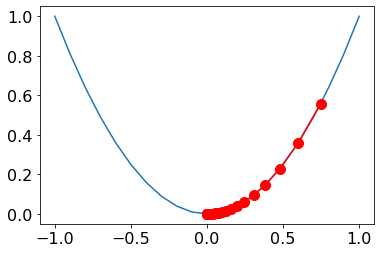

In [15]:
# gradient descent algorithm without momentum
def gradient_descent(objective, derivative, bounds, n_iter, step_size):
    # track all solutions
    solutions, scores = list(), list()
    # generate an initial point
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # run the gradient descent
    for i in range(n_iter):
        # calculate gradient
        gradient = derivative(solution)
        # take a step
        solution = solution - step_size * gradient
        # evaluate candidate point
        solution_eval = objective(solution)
        # store solution
        solutions.append(solution)
        scores.append(solution_eval)
    return [solutions, scores]

# seed the pseudo random number generator
seed(4)
# define range for input
bounds = np.asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# perform the gradient descent search
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size)
# sample input range uniformly at 0.1 increments
inputs = np.arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
plt.plot(inputs, results)
# plot the solutions found
plt.plot(solutions, scores, marker = "o", linestyle = "-", c = "red", markersize = 10)
# show the plot
plt.show()

## <font color='blue'>Momentum</font>

**Momentum:** is a method that helps accelerate SGD in the relevant direction and dampens oscillations.

<img src=https://miro.medium.com/max/828/1*OOG5F8GW1YuGV5hcOoc3pA.webp width="700">

In [16]:
# gradient descent algorithm with momentum
def gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum):
    # generate an initial point
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # keep track of the change
    change = 0.0
    # run the gradient descent
    for i in range(n_iter):
        # calculate gradient
        gradient = derivative(solution)
        # calculate update
        new_change = step_size * gradient + momentum * change
        # take a step
        solution = solution - new_change
        # save the change
        change = new_change
        # evaluate candidate point
        solution_eval = objective(solution)
        # report progress
        print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
    return [solution, solution_eval]

# seed the pseudo random number generator
seed(4)
# define range for input
bounds = np.asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# define momentum
momentum = 0.3
# perform the gradient descent search with momentum
best, score = gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum)
print('Done!')
print('f(%s) = %f' % (best, score))

>0 f([0.74724774]) = 0.55838
>1 f([0.54175461]) = 0.29350
>2 f([0.37175575]) = 0.13820
>3 f([0.24640494]) = 0.06072
>4 f([0.15951871]) = 0.02545
>5 f([0.1015491]) = 0.01031
>6 f([0.0638484]) = 0.00408
>7 f([0.03976851]) = 0.00158
>8 f([0.02459084]) = 0.00060
>9 f([0.01511937]) = 0.00023
>10 f([0.00925406]) = 0.00009
>11 f([0.00564365]) = 0.00003
>12 f([0.0034318]) = 0.00001
>13 f([0.00208188]) = 0.00000
>14 f([0.00126053]) = 0.00000
>15 f([0.00076202]) = 0.00000
>16 f([0.00046006]) = 0.00000
>17 f([0.00027746]) = 0.00000
>18 f([0.00016719]) = 0.00000
>19 f([0.00010067]) = 0.00000
>20 f([6.05804744e-05]) = 0.00000
>21 f([3.64373635e-05]) = 0.00000
>22 f([2.19069576e-05]) = 0.00000
>23 f([1.31664443e-05]) = 0.00000
>24 f([7.91100141e-06]) = 0.00000
>25 f([4.75216828e-06]) = 0.00000
>26 f([2.85408468e-06]) = 0.00000
>27 f([1.71384267e-06]) = 0.00000
>28 f([1.02900153e-06]) = 0.00000
>29 f([6.17748881e-07]) = 0.00000
Done!
f([6.17748881e-07]) = 0.000000


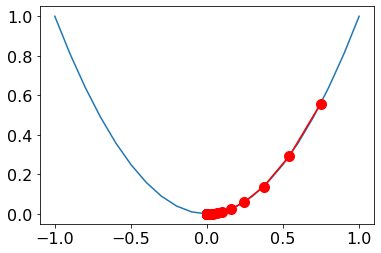

In [17]:
# gradient descent algorithm with momentum
def gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum):
    # track all solutions
    solutions, scores = list(), list()
    # generate an initial point
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # keep track of the change
    change = 0.0
    # run the gradient descent
    for i in range(n_iter):
        # calculate gradient
        gradient = derivative(solution)
        # calculate update
        new_change = step_size * gradient + momentum * change
        # take a step
        solution = solution - new_change
        # save the change
        change = new_change
        # evaluate candidate point
        solution_eval = objective(solution)
        # store solution
        solutions.append(solution)
        scores.append(solution_eval)
    return [solutions, scores]

# seed the pseudo random number generator
seed(4)
# define range for input
bounds = np.asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# define momentum
momentum = 0.3
# perform the gradient descent search with momentum
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum)
# sample input range uniformly at 0.1 increments
inputs = np.arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
plt.plot(inputs, results)
# plot the solutions found
plt.plot(solutions, scores, marker = "o", linestyle = "-", c = "red", markersize = 10)
# show the plot
plt.show()

## <font color='blue'>Adam</font>

**Adaptive Moment Estimation (Adam):** is another method that computes adaptive learning rates for each parameter. Adam behaves like a heavy ball with friction, which prefers flat minima in the error surface, unlike momentum can be seen as a ball running down a slope.

In [18]:
# gradient descent optimization with adam for a two-dimensional test function
from math import sqrt
from mpl_toolkits.mplot3d import Axes3D

# objective function
def objective(x, y):
    return x**2.0 + y**2.0
# derivative of objective function
def derivative(x, y):
    return np.asarray([x * 2.0, y * 2.0])

# gradient descent algorithm with adam
def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):
    # generate an initial point
    x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    score = objective(x[0], x[1])
    # initialize first and second moments
    m = [0.0 for _ in range(bounds.shape[0])]
    v = [0.0 for _ in range(bounds.shape[0])]
    # run the gradient descent updates
    for t in range(n_iter):
        # calculate gradient g(t)
        g = derivative(x[0], x[1])
        # build a solution one variable at a time
        for i in range(x.shape[0]):
            # m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
            m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
            # v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
            v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
            # mhat(t) = m(t) / (1 - beta1(t))
            mhat = m[i] / (1.0 - beta1**(t+1))
            # vhat(t) = v(t) / (1 - beta2(t))
            vhat = v[i] / (1.0 - beta2**(t+1))
            # x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + eps)
            x[i] = x[i] - alpha * mhat / (sqrt(vhat) + eps)
        # evaluate candidate point
        score = objective(x[0], x[1])
        # report progress
        print(">%d f(%s) = %.5f" % (t, x, score))
    return [x, score]

# seed the pseudo random number generator
seed(1)
# define range for input
bounds = np.asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 60
# steps size
alpha = 0.02
# factor for average gradient
beta1 = 0.8
# factor for average squared gradient
beta2 = 0.999
# perform the gradient descent search with adam
best, score = adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2)
print('Done!')
print('f(%s) = %f' % (best, score))

>0 f([-0.14595599  0.42064899]) = 0.19825
>1 f([-0.12613855  0.40070573]) = 0.17648
>2 f([-0.10665938  0.3808601 ]) = 0.15643
>3 f([-0.08770234  0.3611548 ]) = 0.13812
>4 f([-0.06947941  0.34163405]) = 0.12154
>5 f([-0.05222756  0.32234308]) = 0.10663
>6 f([-0.03620086  0.30332769]) = 0.09332
>7 f([-0.02165679  0.28463383]) = 0.08149
>8 f([-0.00883663  0.26630707]) = 0.07100
>9 f([0.00205801 0.24839209]) = 0.06170
>10 f([0.01088844 0.23093228]) = 0.05345
>11 f([0.01759677 0.2139692 ]) = 0.04609
>12 f([0.02221425 0.19754214]) = 0.03952
>13 f([0.02485859 0.18168769]) = 0.03363
>14 f([0.02572196 0.16643933]) = 0.02836
>15 f([0.02505339 0.15182705]) = 0.02368
>16 f([0.02313917 0.13787701]) = 0.01955
>17 f([0.02028406 0.12461125]) = 0.01594
>18 f([0.01679451 0.11204744]) = 0.01284
>19 f([0.01296436 0.10019867]) = 0.01021
>20 f([0.00906264 0.08907337]) = 0.00802
>21 f([0.00532366 0.07867522]) = 0.00622
>22 f([0.00193919 0.06900318]) = 0.00477
>23 f([-0.00094677  0.06005154]) = 0.00361
>24 f(

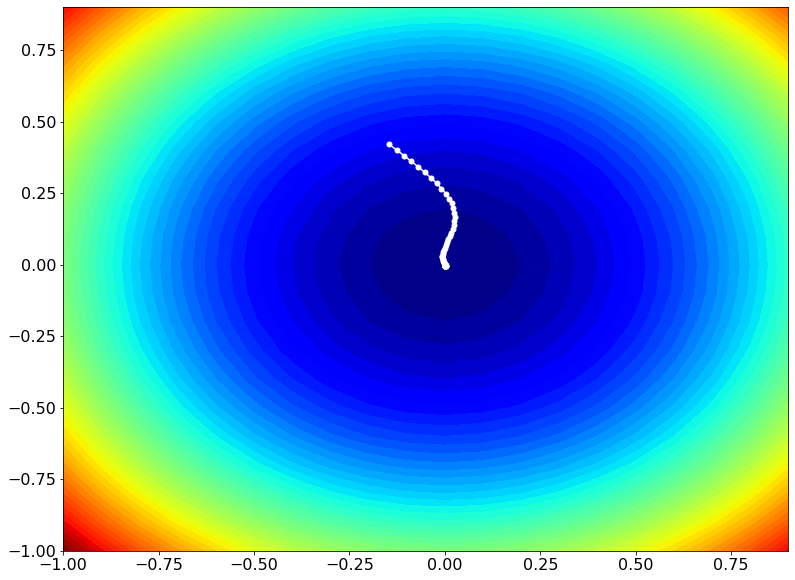

In [19]:
# gradient descent algorithm with adam
def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):
    solutions = list()
    # generate an initial point
    x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    score = objective(x[0], x[1])
    # initialize first and second moments
    m = [0.0 for _ in range(bounds.shape[0])]
    v = [0.0 for _ in range(bounds.shape[0])]
    # run the gradient descent updates
    for t in range(n_iter):
        # calculate gradient g(t)
        g = derivative(x[0], x[1])
        # build a solution one variable at a time
        for i in range(bounds.shape[0]):
            # m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
            m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
            # v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
            v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
            # mhat(t) = m(t) / (1 - beta1(t))
            mhat = m[i] / (1.0 - beta1**(t+1))
            # vhat(t) = v(t) / (1 - beta2(t))
            vhat = v[i] / (1.0 - beta2**(t+1))
            # x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + ep)
            x[i] = x[i] - alpha * mhat / (sqrt(vhat) + eps)
        # evaluate candidate point
        score = objective(x[0], x[1])
        # keep track of solutions
        solutions.append(x.copy())
    return solutions

# seed the pseudo random number generator
seed(1)
# define range for input
bounds = np.asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 60
# steps size
alpha = 0.02
# factor for average gradient
beta1 = 0.8
# factor for average squared gradient
beta2 = 0.999
# perform the gradient descent search with adam
solutions = adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2)
# sample input range uniformly at 0.1 increments
xaxis = np.arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = np.arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = np.meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
plt.figure(figsize=(13,10))
plt.contourf(x, y, results, levels = 50, cmap = "jet")
# plot the sample as black circles
solutions = np.asarray(solutions)
plt.plot(solutions[:, 0], solutions[:, 1], marker = "o", linestyle = "-", c = "white", markersize = 5)
# show the plot
plt.show()

## <font color='orange'>Momentum versus Adam</font>

## <font color='red'>Advantages and Disadvantages:</font>

**Advantages of Momentum:**
- Momentum simply moves faster (because of all the momentum it accumulates).
- Momentum has a shot at escaping local minima (because the momentum may propel it out of a local minimum).

**Disadvantages of Momentum:**
- Does not have notion of where it is going so does not slow down before the hill slopes up again.
- Does not updates each individual parameter to perform larger or smaller updates depending on their importance.

**Advantages of Adam:**
- Slows down when converging to local minima.
- Can handle sparse gradients on noisy datasets.
- Default hyperparameter values do well on most problems.
- Computationally efficient.
- Requires little memory, thus memory efficient.
- Works well on large datasets.

**Disadvantages of Adam:**
- Adam does not converge to an optimal solution in some areas.
- Adam can suffer a weight decay problem.

## <font color='red'>**Resource:**</font>
- Sebastian Ruder_An overview of gradient descent optimization algorithms
    - https://ruder.io/optimizing-gradient-descent/
- Gradient Descent Implementation from Scratch in Python
    - https://www.youtube.com/watch?v=fxX9f4FplQg
- Gradient Descent With Momentum from Scratch
    - https://machinelearningmastery.com/gradient-descent-with-momentum-from-scratch/
- Code Adam Optimization Algorithm From Scratch
    - https://machinelearningmastery.com/adam-optimization-from-scratch/